In [1]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from  sklearn.linear_model import LogisticRegression
from  sklearn.metrics import confusion_matrix,accuracy_score

In [2]:
import pandas as pd
import io
from google.colab import files
uploaded = files.upload()
dataset = pd.read_csv(io.BytesIO(uploaded['exoplanet_data2.csv']))
x = dataset.iloc[:,1:3198].values
y = dataset.iloc[:,0].values

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)



Saving exoplanet_data2.csv to exoplanet_data2.csv


In [3]:
sc_x=StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.fit_transform(xtest)


dataset.head()
dataset.describe()



,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,FLUX.11,FLUX.12,FLUX.13,FLUX.14,FLUX.15,FLUX.16,FLUX.17,FLUX.18,FLUX.19,FLUX.20,FLUX.21,FLUX.22,FLUX.23,FLUX.24,FLUX.25,FLUX.26,FLUX.27,FLUX.28,FLUX.29,FLUX.30,FLUX.31,FLUX.32,FLUX.33,FLUX.34,FLUX.35,FLUX.36,FLUX.37,FLUX.38,FLUX.39,...,FLUX.3158,FLUX.3159,FLUX.3160,FLUX.3161,FLUX.3162,FLUX.3163,FLUX.3164,FLUX.3165,FLUX.3166,FLUX.3167,FLUX.3168,FLUX.3169,FLUX.3170,FLUX.3171,FLUX.3172,FLUX.3173,FLUX.3174,FLUX.3175,FLUX.3176,FLUX.3177,FLUX.3178,FLUX.3179,FLUX.3180,FLUX.3181,FLUX.3182,FLUX.3183,FLUX.3184,FLUX.3185,FLUX.3186,FLUX.3187,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
count,5657.000000,5.657000e+03,5.657000e+03,5.657000e+03,5.657000e+03,5.657000e+03,5.657000e+03,5.657000e+03,5.657000e+03,5.657000e+03,5.657000e+03,5.657000e+03,5.657000e+03,5.657000e+03,5657.000000,5657.000000,5657.000000,5657.00000,5657.000000,5657.000000,5657.000000,5657.000000,5657.000000,5657.000000,5657.000000,5657.000000,5657.000000,5.657000e+03,5.657000e+03,5.657000e+03,5.657000e+03,5.657000e+03,5.657000e+03,5.657000e+03,5.657000e+03,5.657000e+03,5.657000e+03,5.657000e+03,5.657000e+03,5.657000e+03,...,5.657000e+03,5.657000e+03,5.657000e+03,5657.000000,5657.000000,5657.000000,5657.000000,5657.000000,5657.000000,5657.000000,5657.000000,5657.00000,5.657000e+03,5.657000e+03,5657.000000,5657.000000,5657.000000,5657.000000,5657.000000,5657.000000,5657.000000,5657.000000,5657.000000,5657.000000,5657.000000,5657.000000,5657.000000,5657.000000,5657.000000,5657.000000,5.657000e+03,5.657000e+03,5.657000e+03,5.657000e+03,5.657000e+03,5.657000e+03,5657.000000,5657.000000,5657.000000,5657.000000
mean,1.007424,1.818780e+02,1.899880e+02,1.859746e+02,2.149414e+02,1.939128e+02,2.056701e+02,1.572008e+02,1.755816e+02,1.589513e+02,1.918988e+02,1.408971e+02,1.496036e+02,1.041953e+02,104.913534,54.209252,3.521817,-48.23636,-71.588929,-50.710343,-1.283154,25.827942,88.192705,135.327686,214.835947,263.404317,308.660023,4.733665e+02,5.348011e+02,5.713322e+02,5.542485e+02,5.711896e+02,5.465871e+02,2.115192e+02,2.420882e+02,2.564796e+02,2.813011e+02,2.740168e+02,2.980762e+02,2.591122e+02,...,7.384502e+02,7.611680e+02,6.964632e+02,124.380210,142.321967,136.877177,5.325282,-64.298443,-81.136316,16.422995,100.679381,331.99367,5.480218e+02,7.341831e+02,115.864706,67.831529,36.940635,-85.148084,-134.095696,-286.962583,-291.505531,-289.340106,-221.757953,-190.006581,-63.823894,-67.782533,-61.302768,1.498759,67.898075,143.563988,3.194855e+02,4.767082e+02,6.124642e+02,7.019824e+02,6.344282e+02,6.186473e+02,-419.069604,-477.447287,-373.229072,-256.757039
std,0.085852,2.078196e+04,2.105466e+04,2.115745e+04,2.145925e+04,2.224755e+04,2.320462e+04,2.323097e+04,2.208307e+04,2.032349e+04,1.884186e+04,1.782798e+04,1.725114e+04,1.691625e+04,16305.340138,16363.395776,16759.883185,16932.41099,16582.348104,15690.804918,14874.859074,14091.824355,13904.642163,14422.439631,14996.368272,16422.702132,17459.537082,2.425414e+04,2.594910e+04,2.838806e+04,3.168782e+04,3.511854e+04,3.949991e+04,2.004251e+04,2.038323e+04,2.071756e+04,2.100440e+04,2.105212e+04,2.090033e+04,2.060057e+04,...,4.857786e+04,5.532969e+04,5.598053e+04,15434.945511,15618.195789,15002.245344,13876.218415,14337.446872,13966.046916,11771.502372,12158.933468,19302.22135,3.150789e+04,4.385430e+04,15100.809352,14966.413282,13690.858145,12737.291443,12781.352129,13731.418860,14577.897153,14134.355938,13169.023563,11349.582678,10272.950875,10537.569158,10171.515038,10730.417741,15984.850607,19322.597052,2.733373e+04,3.381856e+04,4.135975e+04,4.733550e+04,4.833618e+04,5.073021e+04,17181.524637,17074.095510,15723.359669,14053.418138
min,1.000000,-2.278563e+05,-3.154408e+05,-2.840018e+05,-2.340069e+05,-4.231956e+05,-5.975521e+05,-6.724046e+05,-5.790136e+05,-3.973882e+05,-2.223300e+05,-2.279016e+05,-2.996757e+05,-4.453612e+05,-557042.690000,-695994.840000,-815633.560000,-880865.85000,-892477.410000,-851507.680000,

In [4]:
classifier = LogisticRegression()
classifier.fit(xtrain, ytrain)
y_pred=classifier.predict(xtest)

print(ytest)
print(y_pred)

[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


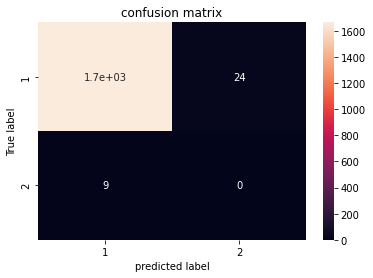

In [5]:
import seaborn as sn 
import matplotlib.pyplot as plt

cm=pd.crosstab(ytest,y_pred)
sn.heatmap(cm,annot=True)
plt.ylabel('True label')
plt.xlabel('predicted label')
plt.title('confusion matrix')
plt.show()

In [6]:
print(":confusion matrix \n", cm)

tn, fp, fn , tp = confusion_matrix(ytest, y_pred).ravel()
print(tn, fp, fn, tp ,"\n")
print("Accuracy : " , accuracy_score(ytest, y_pred))
print("f1 score :",str((2*tp)/(2*tp+fp+fn)) )
print("precision : ",str(tp/(tp+fp)))
print("specificity : ",str(tn/(tn+fp)))
print("sensitivity ", str(tp/(tp+fn)))

:confusion matrix 
 col_0     1   2
row_0          
1      1665  24
2         9   0
1665 24 9 0 

Accuracy :  0.980565371024735
f1 score : 0.0
precision :  0.0
specificity :  0.9857904085257548
sensitivity  0.0
